In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
data = pd.read_csv('car_dataset.csv')

In [85]:
# shows the first 5 coloumns of the data
data.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [86]:
# Showing only the price column for checking 
data['price']

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [87]:
# Shows the data values in stats 
data.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Here the target variable in in number but logistic regression can classify but cannot give numerical prediction. Hence
* We create a new Column as pricerange
* We give 3 values to it as 'high', 'medium', 'low'
* These values are given in a range such as if price is near mean then its medium if its below that its low and if its above that its high
* this is just to predict what is the range of the price, this is made just to make it clasify.
* please understand as we are using the value of price to make the range, its better to exclude the price in the final data frame


In [88]:
# Lets define price range base on mean of the price.
# if price is below 12000 then its low
# if price is above 16000 then its high
# if price is between 12000 and 16000 then its medium

def categorise(row):  
    if row['price'] > 12000 and row['price'] <= 16000:
        return 1
    elif row['price'] > 16000:
        return 2
    elif row['price'] < 12000:
        return 3


In [89]:
# Calling the previous defined function categorise(row) as a lamda function to apply for all rows.

data['pricerange'] = data.apply(lambda row: categorise(row), axis=1)

# Now lets check if desired result is attained
data

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pricerange
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,2
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,2
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,2
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,2
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,2


In [90]:
# Checking the data types and non null rows in the data frame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [91]:
# Defining a new list as all the columns in the data frame
col_list = list(data.columns)

In [92]:
# Removing pricerange and price column as we need to find the correlation between the input variables
col_list.remove('pricerange')
col_list.remove('price')

In [93]:
# Now lets check the list 
col_list

['ID',
 'symboling',
 'name',
 'fueltypes',
 'aspiration',
 'doornumbers',
 'carbody',
 'drivewheels',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

We have to fill the null or NA values in the data frame with relatable values for that we have the below rules
* For features with numerical data types, we will replace the null values with mean of the feature
* And for features with string data types, we will replace the null values with mode of the feature

In [94]:
# 'fillna()' is a function where it will find null values in the given column and fills it with given value.
# 'data[col].mode()[0]' in this line, we are calling the column name from the column list we have made above and finding the mode of that column
# Here '[0]' at the end means to considering all the data starting from the initial 0th row
# 'data[col].mean()' in this line, we are calling the column name from the column list we have made above and finding the mean of the values in that column
# we need not to use '[0]' here as for mean all the values are considered

for col in col_list:
    if data[col].dtypes== 'object':
        #print('ob')
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        #print('num')
        data[col] = data[col].fillna(data[col].mean())

As in our data frame we do not have any null values this function will not do anything in particular but its helpful if you have null values in data set

In [95]:
# Checking the null values after filling
data.isna().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
pricerange          0
dtype: int64

<Axes: xlabel='wheelbase'>

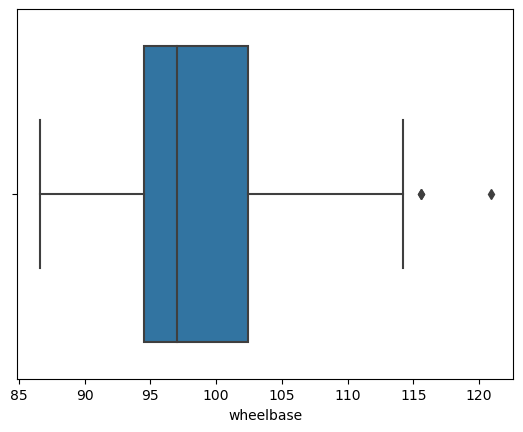

In [96]:
# this to plot the box plot for age and check for outliers 
# BTW, an outlier is a single data point that goes far outside the average value of a group of statistics.
sns.boxplot(x=data['wheelbase'])

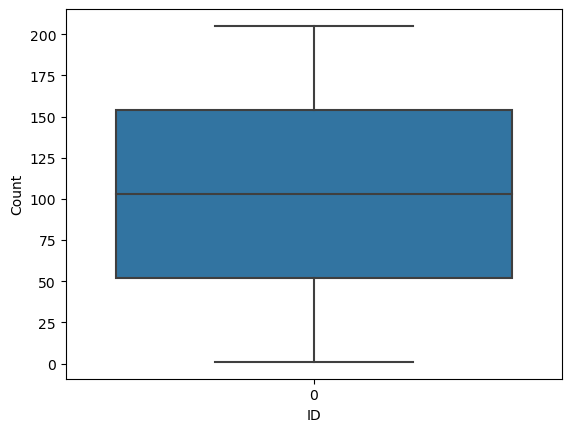

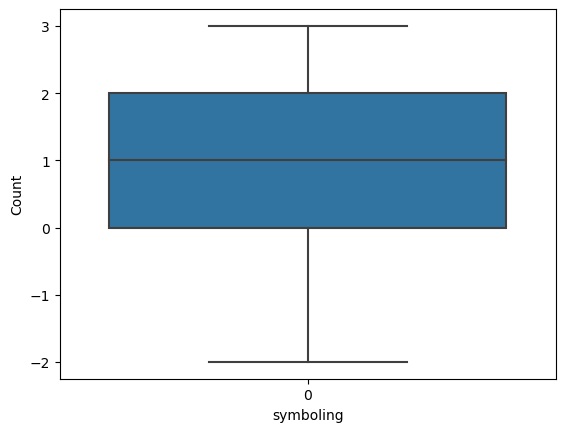

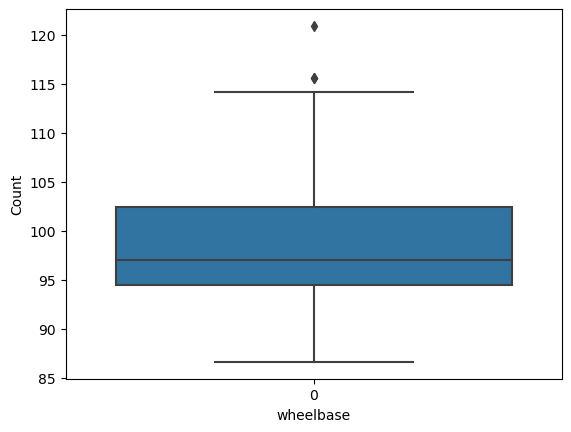

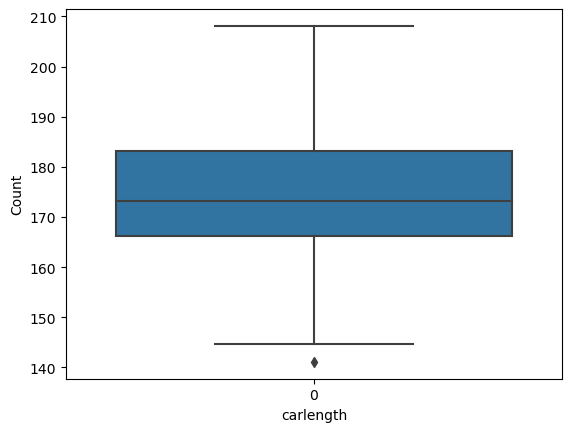

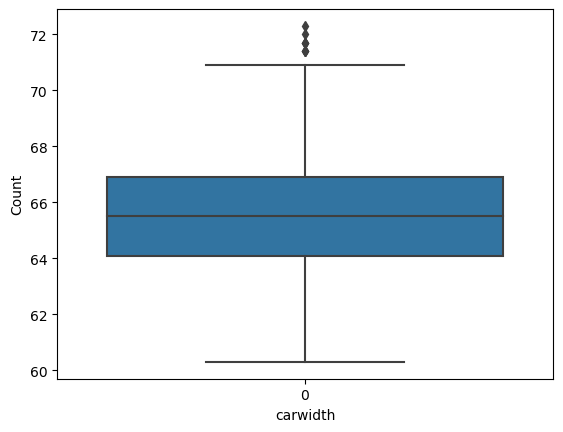

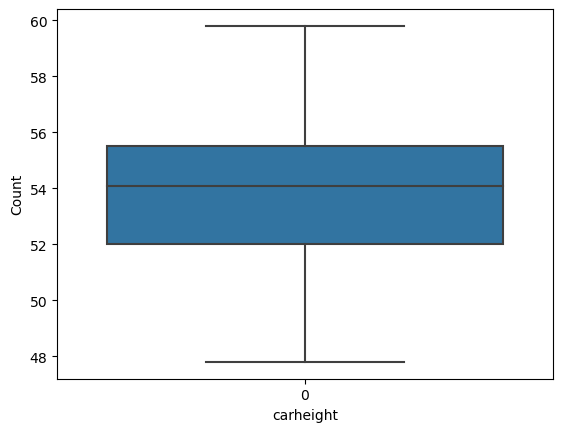

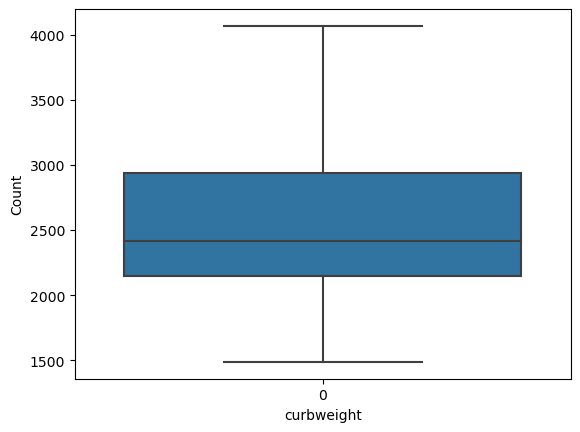

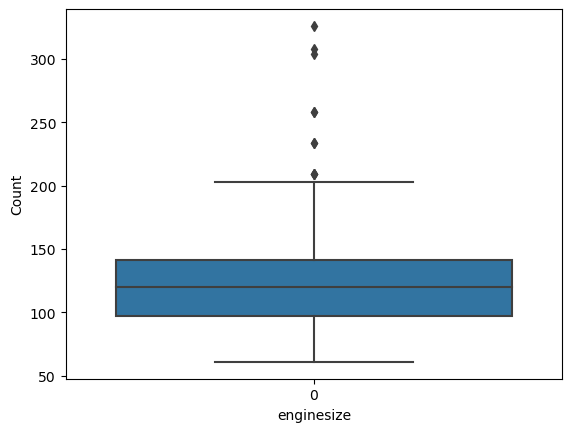

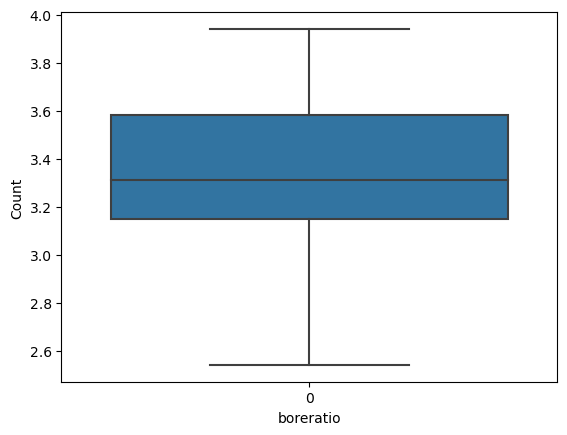

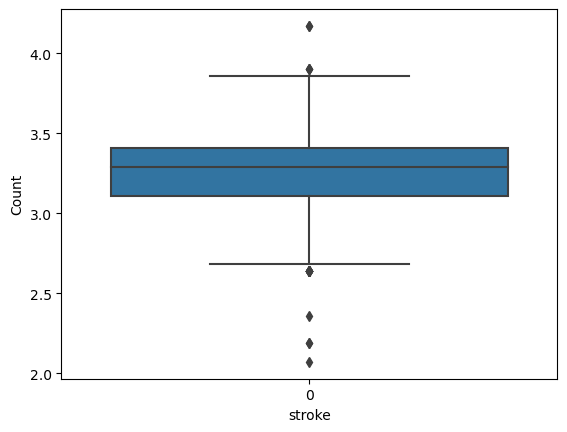

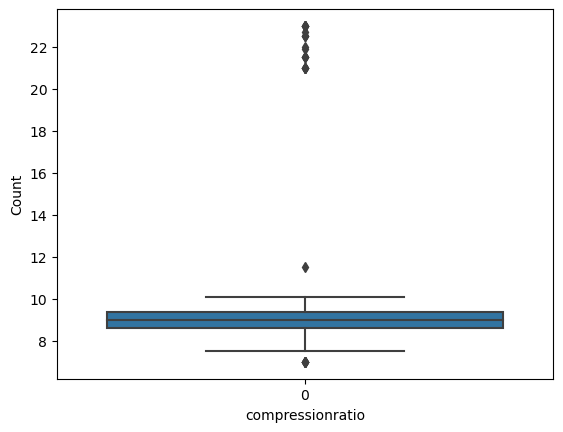

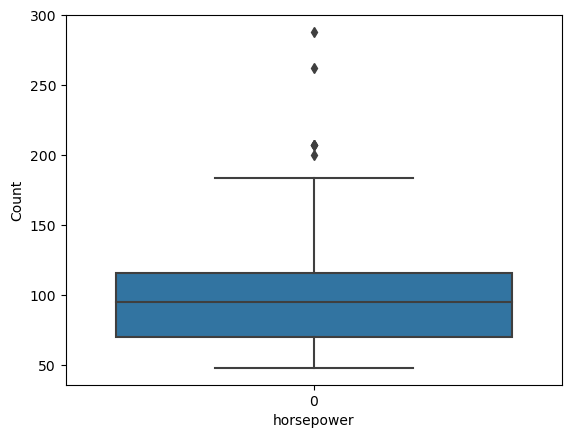

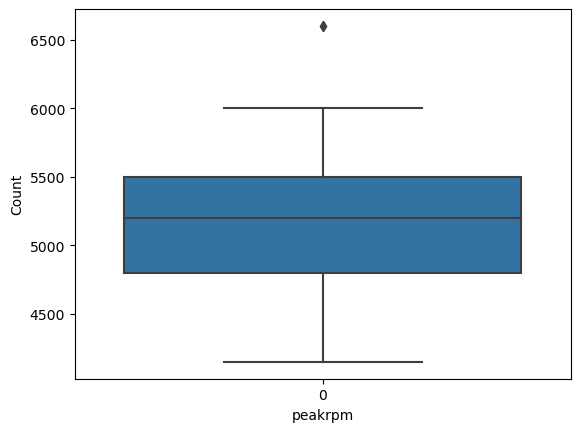

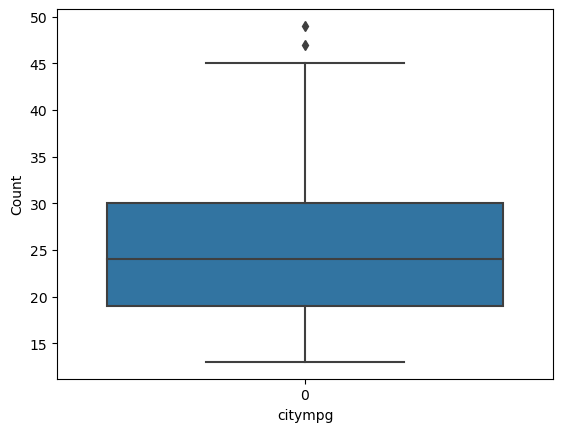

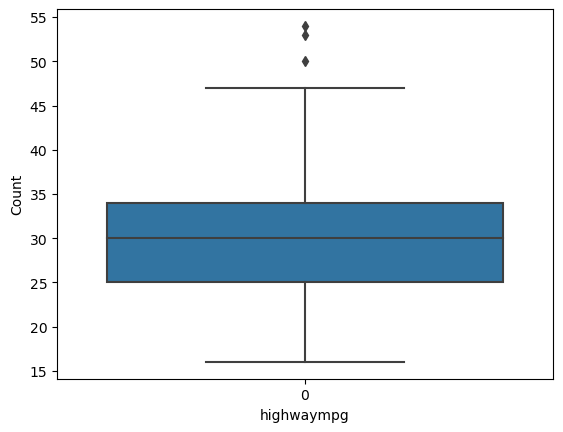

In [97]:
# Just like age feature if you want to boxplot for all features we can use the bewlow code
# 'col_name' is pre defined variable to fetch the column names in a data frame.
# Remeber we are plotting boxplots and hecne only features with numerial values are used and not the other data type features

for col_name in col_list:
    if (data[col_name].dtypes== 'int64' or data[col_name].dtypes== 'float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.show()

In [98]:
# From above boxplots we can see the features with high outliers.
# So we select only the features with high outliers
# Hence to remove this we use (IQR) Inter Quartile Range Meathod 

Q1 = data.carwidth.quantile(0.25)
Q3 = data.carwidth.quantile(0.75)
IQR = Q3-Q1
data = data[(data.carwidth>=Q1-1.5*IQR) & (data.carwidth<= Q3+1.5*IQR)]

Q1 = data.enginesize.quantile(0.25)
Q3 = data.enginesize.quantile(0.75)
IQR = Q3-Q1
data = data[(data.enginesize>=Q1-1.5*IQR) & (data.enginesize<= Q3+1.5*IQR)]

# Please note we are not including compression ratio into this because, for disel engines compression ratio is high
# Data shows that the compression ration of 20 and above are outliers, but that is not true for only disel engines
# This is the probabale reason why we would need little insight in the featues we are dealing with 

Q1 = data.horsepower.quantile(0.25)
Q3 = data.horsepower.quantile(0.75)
IQR = Q3-Q1
data = data[(data.horsepower>=Q1-1.5*IQR) & (data.horsepower<= Q3+1.5*IQR)]

# All other features are well with in the range and we can use them for model


Lets check the features again after removing the outliers

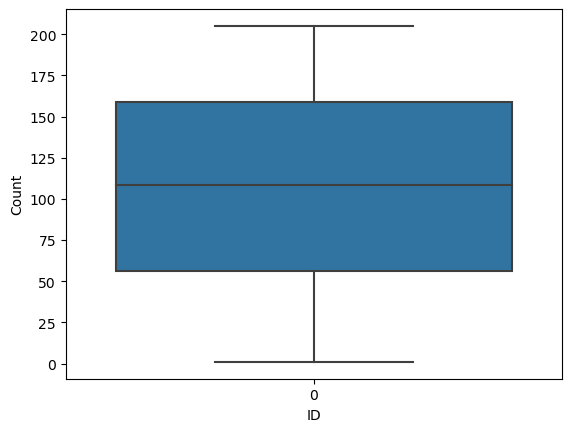

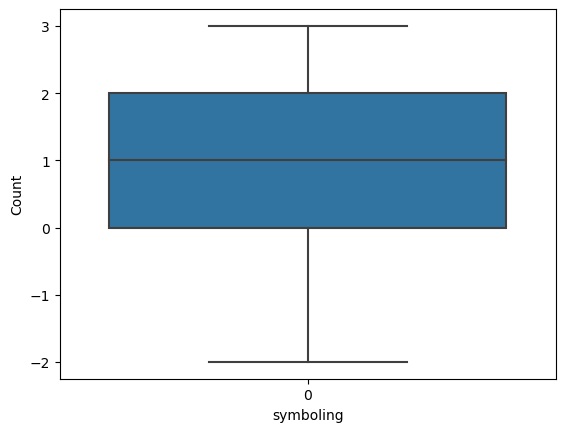

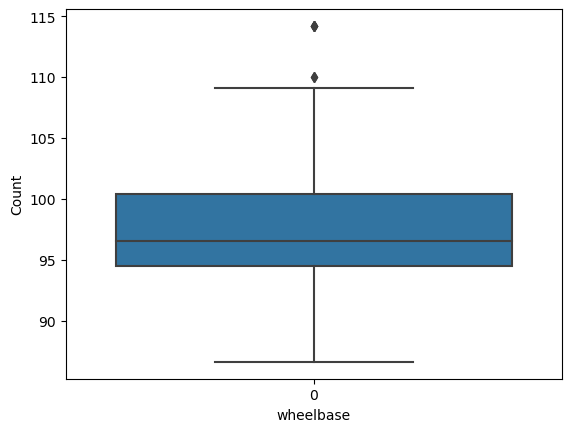

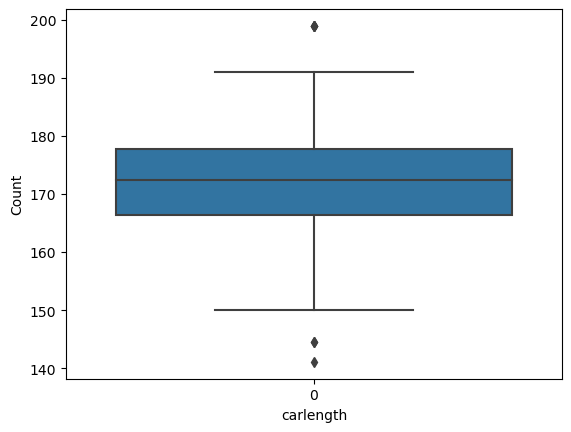

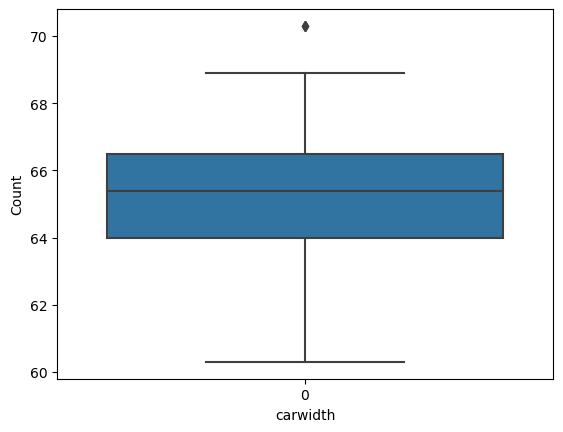

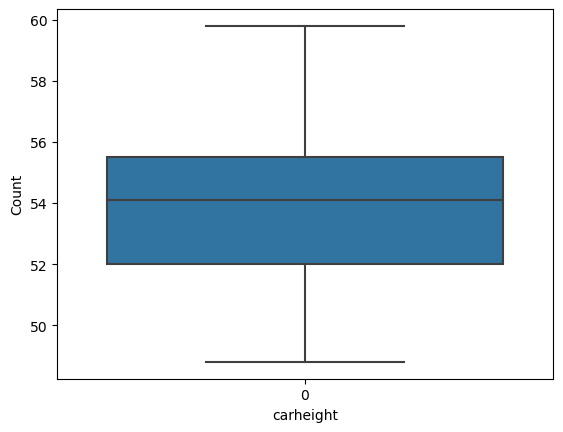

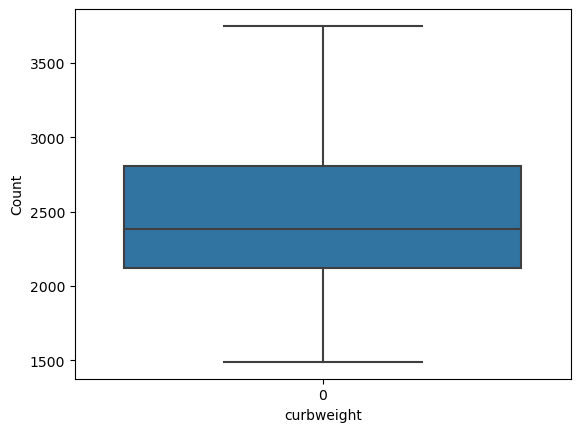

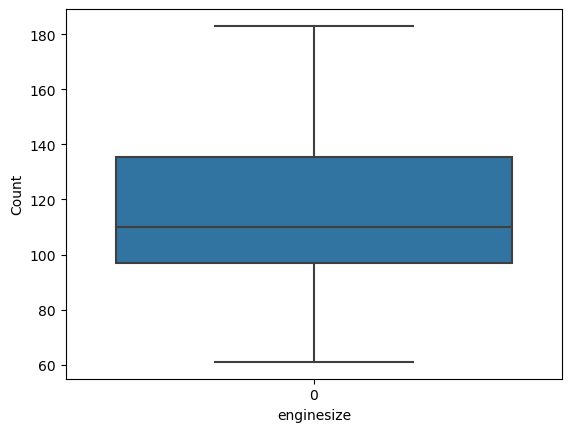

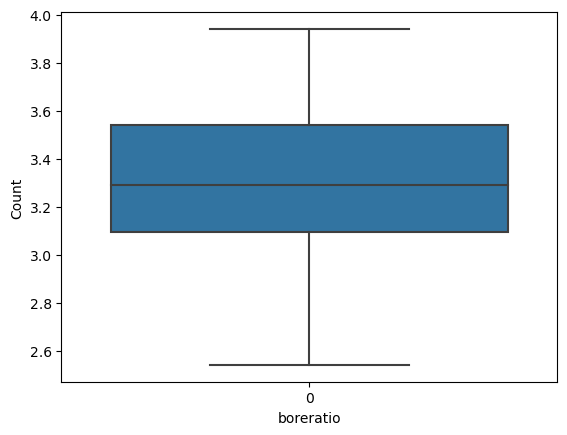

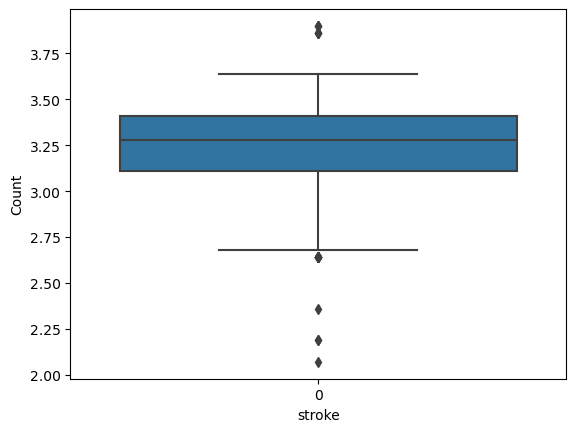

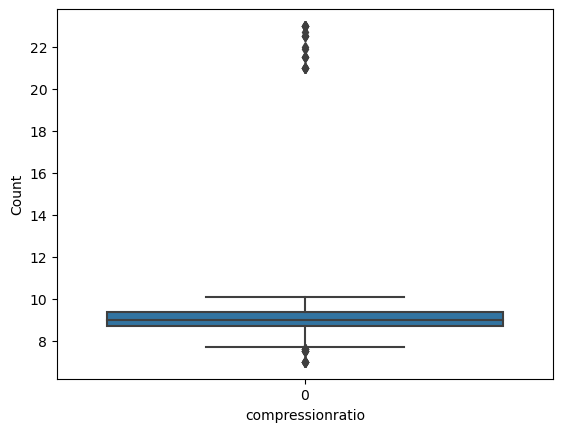

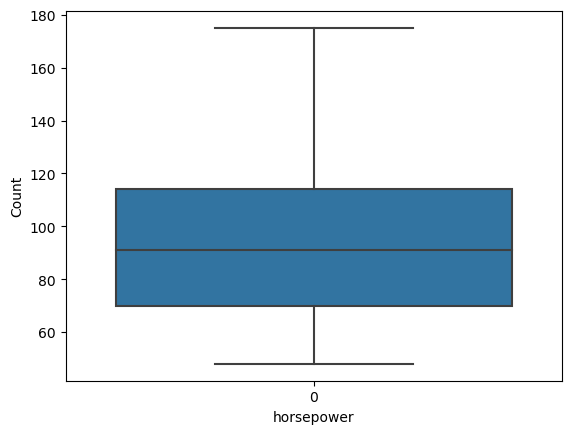

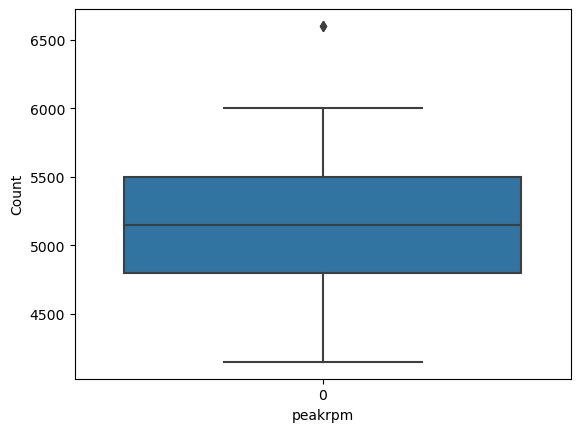

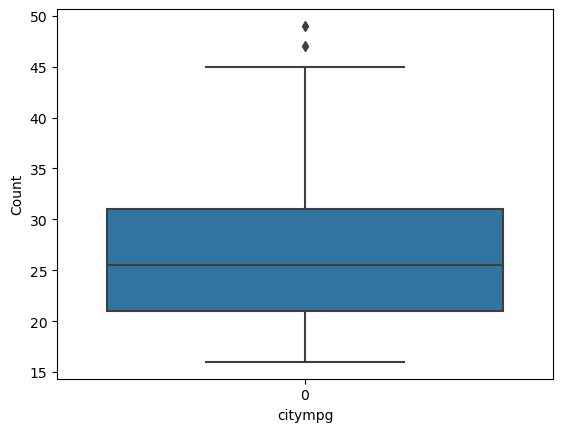

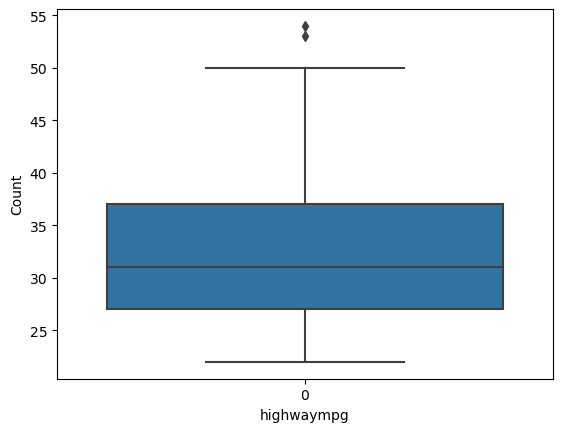

In [99]:
for col_name in col_list:
    if (data[col_name].dtypes== 'int64' or data[col_name].dtypes== 'float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.show()

Here you can see the changes in the featues where we have removed the outliers
* Removing outliers is very important as the values with high deviation from average data, can alter the accuracy of the model
* Also this will not impact our model building

In [100]:
# Now lets encode the lables  
from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()

for i in col_list:
    data[i]=laben.fit_transform(data[i])

## Label Encoding

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

### Example

Suppose we have a column Height in some dataset that has elements as Tall, Medium, and short. To convert this categorical column into a numerical column we will apply label encoding to this column. After applying label encoding, the Height column is converted into a numerical column having elements 0,1, and 2 where 0 is the label for tall, 1 is the label for medium, and 2 is the label for short height.

| Height | Height |
| :----- | :----- |
| Tall | 3
| Medium | 2
| Short | 1
| Midget | 0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                186 non-null    int64  
 1   symboling         186 non-null    int64  
 2   name              186 non-null    int32  
 3   fueltypes         186 non-null    int32  
 4   aspiration        186 non-null    int32  
 5   doornumbers       186 non-null    int32  
 6   carbody           186 non-null    int32  
 7   drivewheels       186 non-null    int32  
 8   enginelocation    186 non-null    int32  
 9   wheelbase         186 non-null    int64  
 10  carlength         186 non-null    int64  
 11  carwidth          186 non-null    int64  
 12  carheight         186 non-null    int64  
 13  curbweight        186 non-null    int64  
 14  enginetype        186 non-null    int32  
 15  cylindernumber    186 non-null    int32  
 16  enginesize        186 non-null    int64  
 1

In [102]:
data = data.drop(['price'], axis=1)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                186 non-null    int64
 1   symboling         186 non-null    int64
 2   name              186 non-null    int32
 3   fueltypes         186 non-null    int32
 4   aspiration        186 non-null    int32
 5   doornumbers       186 non-null    int32
 6   carbody           186 non-null    int32
 7   drivewheels       186 non-null    int32
 8   enginelocation    186 non-null    int32
 9   wheelbase         186 non-null    int64
 10  carlength         186 non-null    int64
 11  carwidth          186 non-null    int64
 12  carheight         186 non-null    int64
 13  curbweight        186 non-null    int64
 14  enginetype        186 non-null    int32
 15  cylindernumber    186 non-null    int32
 16  enginesize        186 non-null    int64
 17  fuelsystem        186 non-null    i

And thus all the feature data types are changed to int
* Remember the data is converted to inter value from a string or any other 
* Due to this a unique string will have a unique value and that is similarly repeated
* And as model gives high weightage to higher values we labled them to treat all values to have same weightage


In [104]:
# Here are tring to find the features with high variation inflation factor(VIF) or Multi colinearity score
# This means that if the VIF is high it is co realted to other features
# Hence if VIF is high we have to remove those features

from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

C:\Users\bandaru\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,ID,141.693703
1,symboling,16.683872
2,name,158.600215
3,fueltypes,42.889259
4,aspiration,3.672736
5,doornumbers,5.058105
6,carbody,26.197540
7,drivewheels,15.707711
8,enginelocation,NaN
9,wheelbase,36.022186


Engine Location column is giving an error as an undefined hecne we drop that column
   

In [105]:
data = data.drop(['enginelocation'], axis=1)

In [106]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,141.693703
1,symboling,16.683872
2,name,158.600215
3,fueltypes,42.889259
4,aspiration,3.672736
5,doornumbers,5.058105
6,carbody,26.197540
7,drivewheels,15.707711
8,wheelbase,36.022186
9,carlength,52.457067


Now the error is gone

Here you can see 'name' has highest VIF score
* But we have to remove the features that have VIF score above six
* This has to be done one by one.
* In every Iteration we remove only the highest VIF score feature

In [107]:
# Here 'axis=1' means drop only one column
# If this is not defined, the function will drop all the columns starting from the stated column
# As pandas considers data table as multi dimensional array, each column is indicative to an axis
# And also may throw some error

data = data.drop(['name'], axis = 1)

In [109]:
# Now lets check how much VIF scores of other colums are changed after dropping the 'name' column
# Usually the VIF score of left over columns will reduce 
# because we have dropped the column which have dependent relation with these left over columns
# that is why performing this steps are very important to filter out a data frame with features having low to no correlation between them 

col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.989824
1,symboling,16.255874
2,fueltypes,42.759014
3,aspiration,3.672234
4,doornumbers,4.984502
5,carbody,26.182078
6,drivewheels,15.645275
7,wheelbase,35.627223
8,carlength,52.456507
9,carwidth,27.073978


In [110]:
data = data.drop(['citympg'], axis = 1)

In [39]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,6.155574
1,symboling,15.773945
2,fueltypes,43.045680
3,aspiration,3.337300
4,doornumbers,4.825618
5,carbody,25.286834
6,drivewheels,15.618013
7,wheelbase,35.439134
8,carlength,50.337065
9,carwidth,27.252464


In [40]:
data = data.drop(['carlength'], axis = 1)

In [111]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.963865
1,symboling,15.762679
2,fueltypes,40.282933
3,aspiration,3.331039
4,doornumbers,4.748704
5,carbody,24.964187
6,drivewheels,15.535361
7,wheelbase,35.236871
8,carlength,49.940782
9,carwidth,27.073952


In [112]:
data = data.drop(['horsepower'], axis = 1)

In [113]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.939583
1,symboling,15.612890
2,fueltypes,35.661987
3,aspiration,2.224248
4,doornumbers,4.739680
5,carbody,24.477732
6,drivewheels,15.535199
7,wheelbase,35.236579
8,carlength,48.983973
9,carwidth,26.843042


In [114]:

data = data.drop(['curbweight'], axis = 1)

In [115]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.939213
1,symboling,15.412175
2,fueltypes,35.463517
3,aspiration,2.093272
4,doornumbers,4.729306
5,carbody,23.987456
6,drivewheels,15.332520
7,wheelbase,35.213873
8,carlength,43.668822
9,carwidth,26.426386


In [117]:
data = data.drop(['carlength'], axis = 1)

In [118]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.938385
1,symboling,15.181618
2,fueltypes,35.252756
3,aspiration,2.043540
4,doornumbers,4.596907
5,carbody,23.334840
6,drivewheels,15.240765
7,wheelbase,30.665384
8,carwidth,22.061173
9,carheight,11.119532


In [120]:
data = data.drop(['fueltypes'], axis=1)

In [121]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.765322
1,symboling,14.483317
2,aspiration,1.731052
3,doornumbers,4.523669
4,carbody,22.108600
5,drivewheels,15.143303
6,wheelbase,30.616876
7,carwidth,22.006989
8,carheight,11.090545
9,enginetype,11.231066


In [123]:
data = data.drop(['wheelbase'], axis=1)

In [124]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.753465
1,symboling,12.665741
2,aspiration,1.725349
3,doornumbers,4.518269
4,carbody,21.656611
5,drivewheels,14.281410
6,carwidth,14.706689
7,carheight,8.583947
8,enginetype,10.970858
9,cylindernumber,9.851692


In [125]:
data = data.drop(['carbody'], axis=1)

In [126]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.747005
1,symboling,12.656934
2,aspiration,1.680724
3,doornumbers,3.819069
4,drivewheels,14.278502
5,carwidth,14.702294
6,carheight,6.353838
7,enginetype,10.547938
8,cylindernumber,9.659513
9,enginesize,13.982221


In [127]:
data = data.drop(['carwidth'], axis=1)

In [128]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.711392
1,symboling,12.655986
2,aspiration,1.624609
3,doornumbers,3.777687
4,drivewheels,14.137203
5,carheight,5.762787
6,enginetype,10.522599
7,cylindernumber,9.659218
8,enginesize,12.634053
9,fuelsystem,7.731895


In [129]:
data = data.drop(['symboling'], axis=1)

In [130]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.684312
1,aspiration,1.623061
2,doornumbers,2.443884
3,drivewheels,13.398618
4,carheight,5.731680
5,enginetype,10.432685
6,cylindernumber,8.826680
7,enginesize,12.634009
8,fuelsystem,7.157250
9,boreratio,9.768141


In [131]:
data = data.drop(['drivewheels'], axis=1)

In [132]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.666634
1,aspiration,1.619489
2,doornumbers,2.402622
3,carheight,5.731503
4,enginetype,9.087664
5,cylindernumber,7.102955
6,enginesize,11.648596
7,fuelsystem,7.066004
8,boreratio,8.819996
9,stroke,8.138162


In [133]:
data = data.drop(['enginesize'], axis=1)

In [134]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.643301
1,aspiration,1.588306
2,doornumbers,2.377823
3,carheight,5.530390
4,enginetype,9.063921
5,cylindernumber,7.091459
6,fuelsystem,6.273687
7,boreratio,6.685017
8,stroke,5.396933
9,compressionratio,6.832282


In [136]:
data = data.drop(['enginetype'], axis=1)

In [137]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.643300
1,aspiration,1.586890
2,doornumbers,2.377184
3,carheight,5.530302
4,cylindernumber,5.133508
5,fuelsystem,6.178844
6,boreratio,5.903715
7,stroke,5.289733
8,compressionratio,6.774522
9,peakrpm,5.587324


In [138]:
data = data.drop(['compressionratio'], axis=1)

In [139]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'pricerange') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,ID,5.590971
1,aspiration,1.583969
2,doornumbers,2.376819
3,carheight,5.340922
4,cylindernumber,4.698999
5,fuelsystem,6.170376
6,boreratio,5.881282
7,stroke,5.240088
8,peakrpm,5.528548
9,highwaympg,4.605976


* Now all the features in the data frame have VIF scores less than 6.
* So now this is much reliable data for constructing our model
* We might think that, may be we have dropped a feature which is directly related to output or target variable 'pricerange'
* But as there are other features which are in correaltion with that feature, indiretly the influence of that dropped feature is carried forward in the un-deleted feature which are in correlation with dropped feature
* Hence we can say that there is not much of a data loss by this process

In [141]:
vif_data.feature

0                ID
1        aspiration
2       doornumbers
3         carheight
4    cylindernumber
5        fuelsystem
6         boreratio
7            stroke
8           peakrpm
9        highwaympg
Name: feature, dtype: object

In [142]:
ind_features = list(vif_data.feature)
ind_features

['ID',
 'aspiration',
 'doornumbers',
 'carheight',
 'cylindernumber',
 'fuelsystem',
 'boreratio',
 'stroke',
 'peakrpm',
 'highwaympg']

In [143]:
ind_df = data[ind_features]
ind_df

,ID,aspiration,doornumbers,carheight,cylindernumber,fuelsystem,boreratio,stroke,peakrpm,highwaympg
0,0,0,1,0,1,5,23,4,9,5
1,1,0,1,0,1,5,23,4,9,5
2,2,0,1,12,2,5,1,25,9,4
3,3,0,0,24,1,5,13,22,15,8
4,4,0,0,24,0,5,13,22,15,0
...,...,...,...,...,...,...,...,...,...,...
200,181,0,0,32,1,5,33,12,14,6
201,182,1,0,32,1,5,33,12,13,3
202,183,0,0,32,2,5,26,6,15,1
203,184,1,0,32,2,3,6,22,7,5


In [144]:
dep_df = data['pricerange']
dep_df = dep_df.astype('int64')
dep_df

0      1
1      2
2      2
3      1
4      2
      ..
200    2
201    2
202    2
203    2
204    2
Name: pricerange, Length: 186, dtype: int64

In [145]:
x = ind_df
x

,ID,aspiration,doornumbers,carheight,cylindernumber,fuelsystem,boreratio,stroke,peakrpm,highwaympg
0,0,0,1,0,1,5,23,4,9,5
1,1,0,1,0,1,5,23,4,9,5
2,2,0,1,12,2,5,1,25,9,4
3,3,0,0,24,1,5,13,22,15,8
4,4,0,0,24,0,5,13,22,15,0
...,...,...,...,...,...,...,...,...,...,...
200,181,0,0,32,1,5,33,12,14,6
201,182,1,0,32,1,5,33,12,13,3
202,183,0,0,32,2,5,26,6,15,1
203,184,1,0,32,2,3,6,22,7,5


In [146]:
y = dep_df
y

0      1
1      2
2      2
3      1
4      2
      ..
200    2
201    2
202    2
203    2
204    2
Name: pricerange, Length: 186, dtype: int64

In [147]:
# Just like as linear regression we now split the data for test and training the model
# Random state define how to randomize the data for spliting
# example if random state is 5 then the gap betweeen first and second rows selcted for test is 5 and same goes for train too
# Here we are using random state as 30 as we have large set of data, and its better to use random state from 30 to 50

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state= 30)

In [148]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\bandaru\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [149]:
y_pred = logisticRegr.predict(x_test)

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test,y_pred)

In [152]:
print(ac)

0.7659574468085106


In [153]:
print(cm)

[[ 4  7  1]
 [ 1  5  1]
 [ 0  1 27]]


In [154]:
print(cr)

              precision    recall  f1-score   support

           1       0.80      0.33      0.47        12
           2       0.38      0.71      0.50         7
           3       0.93      0.96      0.95        28

    accuracy                           0.77        47
   macro avg       0.71      0.67      0.64        47
weighted avg       0.82      0.77      0.76        47



* Hecne we can see this model is 77% accurate
* Just like our linear regression model, its accuracy is near to 77% stating for logistic regression, correlation actually take out a lot of featues
* And thus the accuracy cannot be improved here